In [56]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error,r2_score

In [57]:
os.listdir()

['2015-2017 (World Happiness Data)_2015-2017.csv',
 '2015-2017 (World Happiness Data)_2015-2017.xlsx',
 'An Interim Technical Department Report.docx',
 'bagudo',
 'Booktree.ngTHE_POWER_OF_YOUR_MIND_020216.pdf',
 'Custom Office Templates',
 'dataset.my',
 'desktop.ini',
 'Execl Cheat Sheet.jpg',
 'Flood Doctors.docx',
 'Fraud Transaction Dashborad.pbix',
 'HR Employee Attrition.pbix',
 'KingsoftData',
 'Kore',
 'Korede Joshua 08130908194.xlsx',
 'My Music',
 'My Pictures',
 'My Tableau Repository',
 'My Videos',
 'SALES.pbix',
 'Seven habits of highly effective people ( PDFDrive ).pdf',
 'the-5-am-club.pdf',
 'WorkSpace',
 'WPS Cloud Files',
 'zTableau Repository',
 '~$rede Elijah Joshua.docx',
 '~$rede Joshua Resume.docx',
 '~$shua Korede Elijah-cover-letter.docx']

In [58]:
os.getcwd()
os.chdir('C:\\Users\\user\\Documents')
os.getcwd()
os.listdir()

['2015-2017 (World Happiness Data)_2015-2017.csv',
 '2015-2017 (World Happiness Data)_2015-2017.xlsx',
 'An Interim Technical Department Report.docx',
 'bagudo',
 'Booktree.ngTHE_POWER_OF_YOUR_MIND_020216.pdf',
 'Custom Office Templates',
 'dataset.my',
 'desktop.ini',
 'Execl Cheat Sheet.jpg',
 'Flood Doctors.docx',
 'Fraud Transaction Dashborad.pbix',
 'HR Employee Attrition.pbix',
 'KingsoftData',
 'Kore',
 'Korede Joshua 08130908194.xlsx',
 'My Music',
 'My Pictures',
 'My Tableau Repository',
 'My Videos',
 'SALES.pbix',
 'Seven habits of highly effective people ( PDFDrive ).pdf',
 'the-5-am-club.pdf',
 'WorkSpace',
 'WPS Cloud Files',
 'zTableau Repository',
 '~$rede Elijah Joshua.docx',
 '~$rede Joshua Resume.docx',
 '~$shua Korede Elijah-cover-letter.docx']

In [59]:
df = pd.read_csv('2015-2017 (World Happiness Data)_2015-2017.csv')
df.head()

,Country,Region,Year,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Trust (Government Corruption)
0,Switzerland,Western Europe,1/1/2015,2.51738,1.4,1.3,0.66557,0.3,1,7.6,0.9,0.4
1,Iceland,Western Europe,1/1/2015,2.70201,1.3,1.4,0.62877,0.4,2,7.6,0.9,0.1
2,Denmark,Western Europe,1/1/2015,2.49204,1.3,1.4,0.64938,0.3,3,7.5,0.9,0.5
3,Norway,Western Europe,1/1/2015,2.46531,1.5,1.3,0.66973,0.3,4,7.5,0.9,0.4
4,Canada,North America,1/1/2015,2.45176,1.3,1.3,0.63297,0.5,5,7.4,0.9,0.3


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        465 non-null    object 
 1   Region                         465 non-null    object 
 2   Year                           465 non-null    object 
 3   Dystopia Residual              465 non-null    float64
 4   Economy (GDP per Capita)       465 non-null    float64
 5   Family                         465 non-null    float64
 6   Freedom                        465 non-null    float64
 7   Generosity                     465 non-null    float64
 8   Happiness Rank                 465 non-null    int64  
 9   Happiness Score                465 non-null    float64
 10  Health (Life Expectancy)       465 non-null    float64
 11  Trust (Government Corruption)  465 non-null    float64
dtypes: float64(8), int64(1), object(3)
memory usage: 4

In [61]:
df.duplicated().sum()

0

In [62]:
df.isna().sum()

Country                          0
Region                           0
Year                             0
Dystopia Residual                0
Economy (GDP per Capita)         0
Family                           0
Freedom                          0
Generosity                       0
Happiness Rank                   0
Happiness Score                  0
Health (Life Expectancy)         0
Trust (Government Corruption)    0
dtype: int64

In [63]:
df.describe()

,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Trust (Government Corruption)
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,2.093902,0.928602,0.989247,0.401735,0.202366,78.907527,5.372043,0.576344,0.174839
std,0.561026,0.413275,0.321722,0.150560,0.137460,45.424459,1.141230,0.238800,0.135790
min,0.328580,0.000000,0.000000,0.000000,0.000000,1.000000,2.700000,0.000000,0.000000
25%,1.737990,0.600000,0.800000,0.295817,0.100000,40.000000,4.500000,0.400000,0.100000
50%,2.094590,1.000000,1.000000,0.416910,0.200000,79.000000,5.300000,0.600000,0.100000
75%,2.453730,1.300000,1.200000,0.514690,0.300000,118.000000,6.200000,0.800000,0.200000
max,3.837720,1.900000,1.600000,0.669730,0.800000,158.000000,7.600000,1.000000,0.800000


In [64]:
cols = df.columns

In [65]:
numCols =[]
for col in cols:
    if df[col].dtypes=='int64' or df[col].dtypes=='float':
        numCols.append(col)
    
numCols

['Dystopia Residual',
 'Economy (GDP per Capita)',
 'Family',
 'Freedom',
 'Generosity',
 'Happiness Rank',
 'Happiness Score',
 'Health (Life Expectancy)',
 'Trust (Government Corruption)']

In [66]:
numDf = df[numCols]

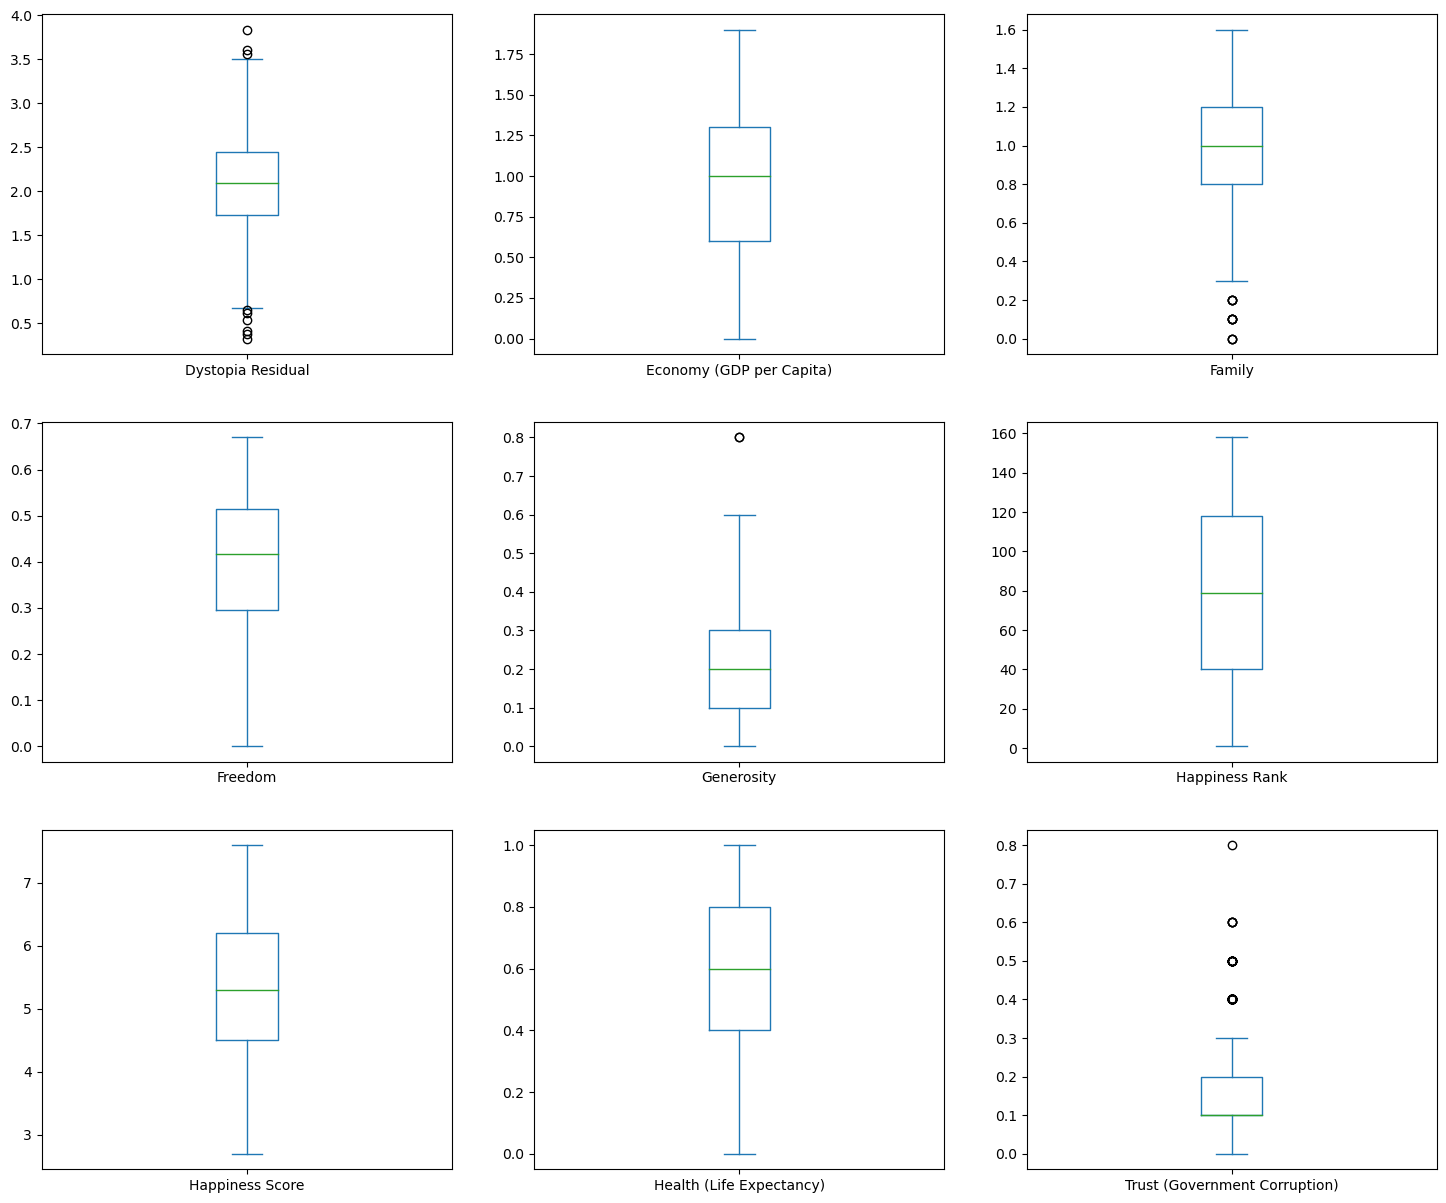

In [67]:
df.plot(kind='box',subplots = True,layout=(3,3),figsize=(18,15))
plt.show()

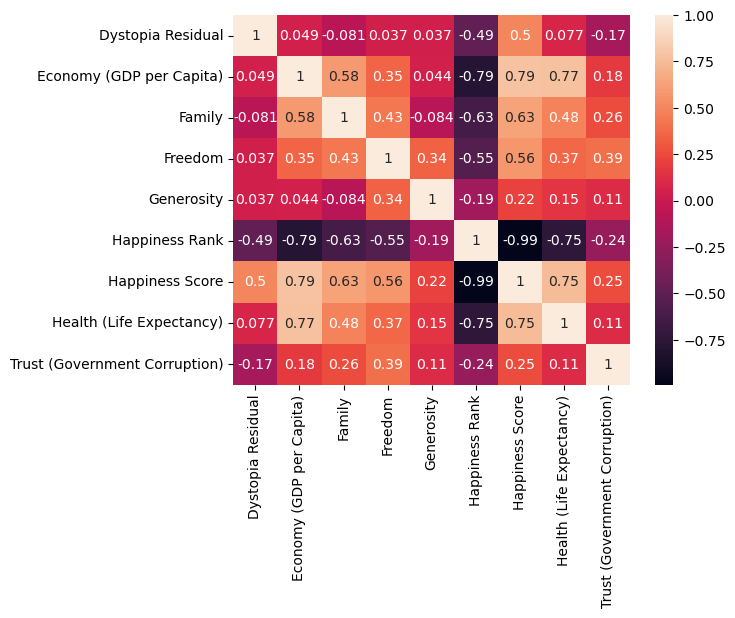

<Figure size 2000x2000 with 0 Axes>

In [68]:
#multicolinarity

sns.heatmap(numDf.corr(),annot=True)
plt.figure(figsize=(20,20))
plt.show()

# Splitting Data

In [69]:
X = df[['Region','Dystopia Residual',
 'Economy (GDP per Capita)',
 'Family',
 'Freedom',
 'Generosity',
 'Health (Life Expectancy)',
 'Trust (Government Corruption)']]

y= df['Happiness Score']

In [70]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

In [71]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.06


# LinearRegression Model

In [72]:
model = make_pipeline( OneHotEncoder(use_cat_names=True),
                     LinearRegression())

In [73]:
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Region'], use_cat_names=True)),
                ('linearregression', LinearRegression())])

In [75]:
y_pred = model.predict(X_test)

In [76]:
mse_LR = MSE(y_test,y_pred)
mae_LR = mean_absolute_error(y_test, y_pred)
rmse_1 = MSE(y_test, y_pred, squared=False)  # Calculate RMSE by setting squared=False in mean_squared_error
rmse_LR = mse_LR** (1/2)
R2_LR=r2_score(y_test,y_pred)


print("Mean Squared Error:", mse_LR)
print("Mean Absolute Error:", mae_LR)
print("Root Mean Squared Error 1:", rmse_1)
print("Root Mean Squared Error 2:", rmse_LR)
print('r2 score',R2_LR)

Mean Squared Error: 0.0042954590991964225
Mean Absolute Error: 0.05296529275688262
Root Mean Squared Error 1: 0.06553975205321136
Root Mean Squared Error 2: 0.06553975205321136
r2 score 0.9968124092189435


In [24]:
acc_train = model.score(X_train,y_train)
acc_test = model.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9971
Test Accuracy: 0.9968


# Ridge Regresssion

In [25]:
scores =[]
for alpha in [0.001,.01,.1,10.0,20.0,50.0]:
    ridge =make_pipeline(OneHotEncoder(use_cat_names=True),
                     Ridge(alpha=alpha))
    ridge.fit(X_train,y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test,y_test))
print(scores)


[0.9968123600079565, 0.9968117618633112, 0.9967911282258864, 0.9700645922662727, 0.9418890023829295, 0.8619611951363375]


In [26]:
# Create the pipeline with named steps
#model = make_pipeline(OneHotEncoder(handle_unknown='ignore', sp),
 #                     ('ridge', Ridge(alpha=1.0)))

In [27]:
ridge =make_pipeline(OneHotEncoder(use_cat_names=True),
                      Ridge())
ridge.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Region'], use_cat_names=True)),
                ('ridge', Ridge())])

In [28]:
y_pred = ridge.predict(X_test)


In [29]:
mse_RDG = MSE(y_test,y_pred)
mae_RDG = mean_absolute_error(y_test, y_pred)
rmse_RDG = mse_RDG** (1/2)
R2_RDG =r2_score(y_test,y_pred)


print("Mean Squared Error:", mse_RDG)
print("Mean Absolute Error:", mae_RDG)
print("Root Mean Squared Error 2:", rmse_RDG)
print('r2 score',R2_RDG)

Mean Squared Error: 0.005920064675208164
Mean Absolute Error: 0.061621375757788054
Root Mean Squared Error 2: 0.07694195653353353
r2 score 0.9956068156753065


In [30]:
rdg_train_acc = model.score(X_train,y_train)
rdg_test_acc = model.score(X_test,y_test)

print("Training Accuracy:", round(rdg_train_acc, 4))
print("Test Accuracy:", round(rdg_test_acc, 4))

Training Accuracy: 0.996
Test Accuracy: 0.9956


# Lasso Regression

In [31]:
scores =[]
for alpha in [0.001,.01,.1,10.0,20.0,50.0]:
    lasso = make_pipeline(OneHotEncoder(use_cat_names=True),
                     Lasso(alpha=alpha))
    lasso.fit(X_train,y_train)
    y_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test,y_test))
print(scores)

[0.9968295097381606, 0.9882715464720805, 0.7869012017462761, -0.004228216553318509, -0.004228216553318509, -0.004228216553318509]


In [32]:
lasso =make_pipeline(OneHotEncoder(use_cat_names=True),
                     Lasso(alpha=.01))
lasso.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Region'], use_cat_names=True)),
                ('lasso', Lasso(alpha=0.01))])

In [33]:
y_pred = lasso.predict(X_test)

In [34]:
mse_LAS = MSE(y_test,y_pred)
mae_LAS = mean_absolute_error(y_test, y_pred)
rmse_LAS = mse_LAS** (1/2)
R2_LAS =r2_score(y_test,y_pred)


print("Mean Squared Error:", mse_LAS)
print("Mean Absolute Error:", mae_LAS)
print("Root Mean Squared Error 2:", rmse_LAS)
print('r2 score',R2_LAS)

Mean Squared Error: 0.015804755342311117
Mean Absolute Error: 0.097832194628528
Root Mean Squared Error 2: 0.1257169652127791
r2 score 0.9882715464720805


In [35]:
las_train_acc = lasso.score(X_train,y_train)
las_test_acc = lasso.score(X_test,y_test)

print("Training Accuracy:", round(las_train_acc, 4))
print("Test Accuracy:", round(las_test_acc, 4))

Training Accuracy: 0.9876
Test Accuracy: 0.9883


# Decision Tree Regressor

In [36]:
dt = make_pipeline(OneHotEncoder(use_cat_names=True),
                   DecisionTreeRegressor(criterion='friedman_mse',max_depth = 10, max_features=9, random_state=42))

In [37]:
dt = make_pipeline(OneHotEncoder(use_cat_names=True),
                   DecisionTreeRegressor(max_depth= 10,random_state=42))

In [38]:
dt.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Region'], use_cat_names=True)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=10, random_state=42))])

In [39]:
y_pred = dt.predict(X_test)

In [40]:
mse_DT = MSE(y_test,y_pred)
mae_DT = mean_absolute_error(y_test, y_pred)
rmse_DT = mse_DT** (1/2)
R2_DT =r2_score(y_test,y_pred)


print("Mean Squared Error:", mse_DT)
print("Mean Absolute Error:", mae_DT)
print("Root Mean Squared Error 2:", rmse_DT)
print('r2 score',R2_DT)

Mean Squared Error: 0.18819664902998237
Mean Absolute Error: 0.3230158730158729
Root Mean Squared Error 2: 0.4338163770882588
r2 score 0.8603423080932324


In [41]:
train_acc = dt.score(X_train,y_train)
test_acc = dt.score(X_test,y_test)

print("Training Accuracy:", round(train_acc, 4))
print("Test Accuracy:", round(test_acc, 4))

Training Accuracy: 0.9987
Test Accuracy: 0.8603


# RandomForest Regressor

In [42]:
rf = make_pipeline(OneHotEncoder(use_cat_names=True),
                   RandomForestRegressor(random_state=42))

In [43]:
rf.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Region'], use_cat_names=True)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [44]:
y_pred=rf.predict(X_test)

In [45]:
mse_RF = MSE(y_test,y_pred)
mae_RF = mean_absolute_error(y_test, y_pred)
rmse_RF = mse_RF** (1/2)
R2_RF =r2_score(y_test,y_pred)


print("Mean Squared Error:", mse_RF)
print("Mean Absolute Error:", mae_RF)
print("Root Mean Squared Error 2:", rmse_RF)
print('r2 score',R2_RF)

Mean Squared Error: 0.07881067142857118
Mean Absolute Error: 0.2207999999999997
Root Mean Squared Error 2: 0.2807323840040033
r2 score 0.9415158743470327


In [46]:
train_acc_score = rf.score(X_train,y_train)
test_acc_score = rf.score(X_test,y_test)

print("Training Accuracy:", round(train_acc_score, 4))
print("Test Accuracy:", round(test_acc_score, 4))

Training Accuracy: 0.991
Test Accuracy: 0.9415


In [47]:
# Define the models and their results
models = ["Linear Regression", "Ridge Regression","Lasso Regression","Decision Tree Regressor", "Random Forest Regressor"]
MSE = [mse_LR,mse_RDG, mse_LAS, mse_DT, mse_RF]
MAE = [mae_LR, mae_RDG, mae_LAS, mae_DT, mae_RF]
RMSE = [rmse_LR, rmse_RDG,rmse_LAS,rmse_DT,rmse_RF]
R2 = [R2_LR, R2_RDG, R2_LAS, R2_DT, R2_RF]

# Create a DataFrame to display the results with indexing starting from 1 and labeled as 'Model no.'
results = pd.DataFrame({
    'Model': models,
    'MSE': MSE,
    'MAE': MAE,
    'RMSE': RMSE,
    'R2 Squared': R2
}, index=range(1, len(models) + 1))  # Start indexing from 1

# Rename the index column to 'Model no.'
results.index.name = 'Model no.'

# Function to highlight minimum MSE, RMSE, MAE, and maximum R-squared values and make the font bold
def highlight_min_max(val):
    style = ''
    if isinstance(val, (int, float)):
        if val == results['MSE'].min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == results['MAE'].min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == results['RMSE'].min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == results['R2 Squared'].max():
            style += 'background-color: rgba(0, 0, 128, 0.3); color: white; font-weight: bold;'
    return style

# Apply the highlight_min_max function to the entire DataFrame
styled_results = results.style.applymap(highlight_min_max)

# Display the styled results DataFrame
styled_results

,Model,MSE,MAE,RMSE,R2 Squared
Model no.,,,,,
1,Linear Regression,0.004295,0.052965,0.065540,0.996812
2,Ridge Regression,0.005920,0.061621,0.076942,0.995607
3,Lasso Regression,0.015805,0.097832,0.125717,0.988272
4,Decision Tree Regressor,0.188197,0.323016,0.433816,0.860342
5,Random Forest Regressor,0.078811,0.220800,0.280732,0.941516


# Feature Importance For Linear Regression

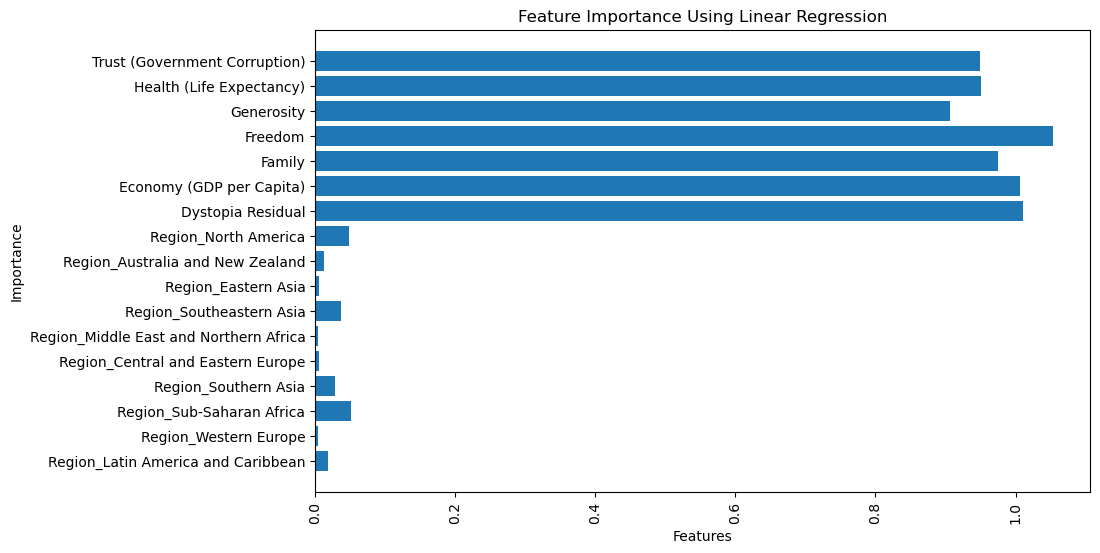

In [78]:
# Extract feature importances
linear_model = model.named_steps['linearregression']
encoder = model.named_steps['onehotencoder']
feature_names = encoder.get_feature_names_out(X.columns)
feature_importances = np.abs(linear_model.coef_)

# Create DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Using Linear Regression')
plt.show()